# Implementing Cluster Analysis on multiple variables using Kmeans 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [6]:
makreting_data = pd.read_csv('./data/marketing_campaign.csv', delimiter='\t')
makreting_data = makreting_data[
    [
        'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
        'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]

In [7]:
makreting_data.head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,635,88,546,172,88,88,3,8,10,4,7
1,11,1,6,2,1,6,2,1,1,2,5
2,426,49,127,111,21,42,1,8,2,10,4
3,11,4,20,10,3,5,2,2,0,4,6
4,173,43,118,46,27,15,5,5,3,6,5


In [8]:
makreting_data.shape

(2240, 11)

In [9]:
makreting_data.dtypes

MntWines               int64
MntFruits              int64
MntMeatProducts        int64
MntFishProducts        int64
MntSweetProducts       int64
MntGoldProds           int64
NumDealsPurchases      int64
NumWebPurchases        int64
NumCatalogPurchases    int64
NumStorePurchases      int64
NumWebVisitsMonth      int64
dtype: object

In [10]:
makreting_data.isnull().sum()

MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
dtype: int64

In [11]:
# Scale the data with StandardScaler

scaler = StandardScaler()

makreting_data_scaled = scaler.fit_transform(makreting_data)

In [13]:
# Build the Kmeans model

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=1)
kmeans.fit(makreting_data_scaled)

/Users/qiaozhang/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=1)

/Users/qiaozhang/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='MntWines', ylabel='MntFruits'>

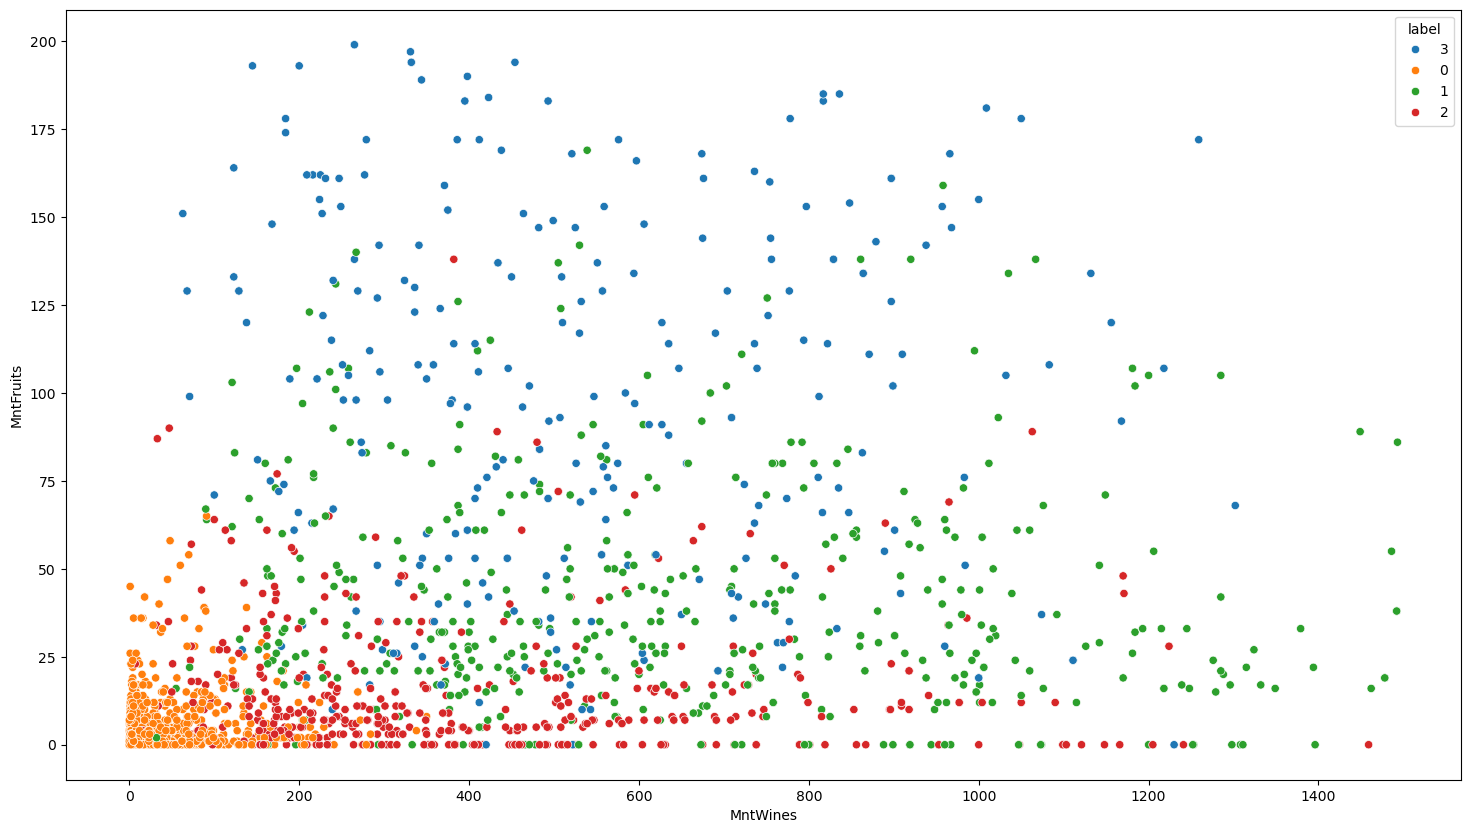

In [16]:
label = kmeans.fit_predict(makreting_data_scaled)

makreting_data_test = makreting_data.copy()

makreting_data_test['label'] = label

makreting_data_test['label'] = makreting_data_test['label'].astype('str')

plt.figure(figsize=(18, 10))

sns.scatterplot(makreting_data_test, x = 'MntWines', y = 'MntFruits', hue='label')

# Choosing the optimal number of clusters in Kmeans

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [27]:
makreting_data = pd.read_csv('./data/marketing_campaign.csv', delimiter='\t')

makreting_data = makreting_data[
    [
        'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
        'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]

In [8]:
scaler = StandardScaler()

makreting_data_scaled = scaler.fit_transform(makreting_data)

In [9]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=1)
kmeans.fit(makreting_data_scaled)

/Users/qiaozhang/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=1)

In [11]:
# [Examine the kmeans cluster output]

label = kmeans.fit_predict(makreting_data_scaled)
makreting_data_output = makreting_data.copy()

makreting_data_output['cluster'] = label
makreting_data_output['cluster'].value_counts()

/Users/qiaozhang/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster
0    1011
1     472
2     469
3     288
Name: count, dtype: int64

/Users/qiaozhang/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/qiaozhang/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/qiaozhang/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/qiaozhang/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

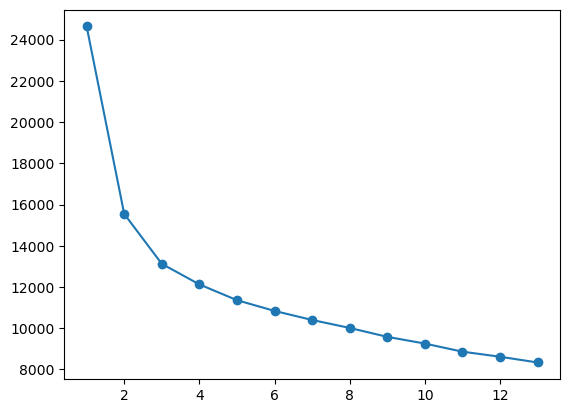

In [14]:
# [Find the optimal number of K clusters using the elbow method]

distance_values = []

for cluster in range(1, 14):
    kmeans = KMeans(n_clusters=cluster, init='k-means++')
    kmeans.fit(makreting_data_scaled)
    distance_values.append(kmeans.inertia_)

cluster_output = pd.DataFrame({
    'cluster': range(1, 14),
    'distance_values': distance_values
})

plt.plot(cluster_output['cluster'], cluster_output['distance_values'], marker='o')
    

In [15]:
from sklearn.metrics import silhouette_score

/Users/qiaozhang/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/qiaozhang/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/qiaozhang/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/qiaozhang/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

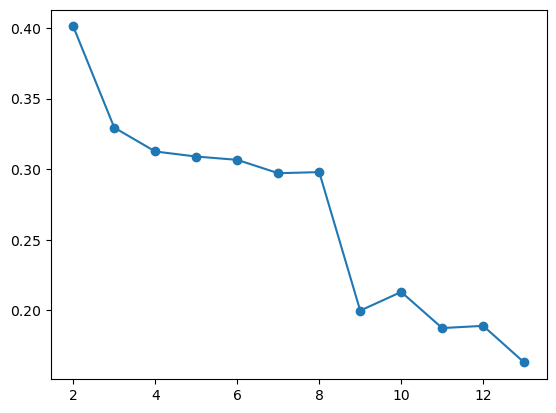

In [19]:
# [Find the optimal number of K clusters using the silhouette score method]

silhouette_scores = []


for cluster in range(2, 14):
    kmeans = KMeans(n_clusters=cluster, init='k-means++')
    label = kmeans.fit_predict(makreting_data_scaled)
    silhouette_scores.append(silhouette_score(makreting_data_scaled, label))

cluster_output = pd.DataFrame({
    'cluster': range(2, 14),
    'silhouette_scores': silhouette_scores
})

plt.plot(cluster_output['cluster'], cluster_output['silhouette_scores'], marker='o')
    

In [17]:
silhouette_score(makreting_data_scaled, label)

0.309604014170592

# Profiling Kmeans clusters

In [22]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=1)

label = kmeans.fit_predict(makreting_data_scaled)
marketing_data_output = makreting_data.copy()

marketing_data_output['cluster'] = label

/Users/qiaozhang/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [25]:
# [Get the overall mean per variable to profile clusters]
import numpy as np

cols =  ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
        'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

overall_mean = marketing_data_output[cols].apply(np.mean).T

overall_mean = pd.DataFrame(overall_mean, columns = ['overall_average'])

overall_mean

,overall_average
MntWines,303.935714
MntFruits,26.302232
MntMeatProducts,166.950000
MntFishProducts,37.525446
MntSweetProducts,27.062946
MntGoldProds,44.021875
NumDealsPurchases,2.325000
NumWebPurchases,4.084821
NumCatalogPurchases,2.662054
NumStorePurchases,5.790179


In [26]:
# [Get the mean per cluster per variable to profile the clusters]

cluster_mean = marketing_data_output.groupby('cluster')[cols].mean().T

cluster_mean

cluster,0,1,2,3
MntWines,39.650841,635.146186,401.690832,529.677083
MntFruits,4.870425,40.942797,14.639659,96.534722
MntMeatProducts,21.113749,362.722458,108.680171,452.937500
MntFishProducts,7.073195,60.894068,20.353945,134.090278
MntSweetProducts,5.056380,39.949153,15.257996,102.420139
MntGoldProds,14.478734,61.750000,57.614072,96.541667
NumDealsPurchases,1.853610,1.703390,4.513859,1.434028
NumWebPurchases,1.997033,5.389831,6.388060,5.524306
NumCatalogPurchases,0.541048,5.610169,2.405117,5.694444
NumStorePurchases,3.222552,8.743644,6.857143,8.225694


# Implementing principle component analysis on multiple variables 

In [28]:
marketing_data = pd.read_csv('./data/marketing_campaign.csv', delimiter='\t')

marketing_data = marketing_data[
    [
        'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
        'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]

In [32]:
scaler = StandardScaler()

marketing_data_scaled = scaler.fit_transform(marketing_data)

In [33]:
from sklearn.decomposition import PCA

pca_marketing = PCA(n_components=6, random_state=1)

principal_components_marketing = pca_marketing.fit_transform(marketing_data_scaled)



In [35]:
principal_marketing_data = pd.DataFrame(data=principal_components_marketing, columns=[f'principal component {n}' for n in range(1,7)])

In [36]:
principal_marketing_data

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6
0,3.800461,0.572973,1.254630,1.083547,0.274886,2.368660
1,-2.175610,-0.928702,-0.117578,0.292224,0.323580,-0.105413
2,1.501507,0.123894,0.096791,-0.992810,-1.071276,-0.602728
3,-2.016701,-0.518668,0.025703,0.070743,-0.181590,-0.227872
4,-0.044173,0.763401,0.238572,1.149119,-0.334696,-0.495866
...,...,...,...,...,...,...
2235,2.660651,1.308848,2.151732,-2.178308,1.453732,0.526411
2236,-1.063664,2.738997,-0.463307,0.821222,-0.336517,-0.070777
2237,1.130411,0.004491,-1.519866,-0.539346,-0.947537,-0.493189
2238,1.749883,0.079894,-0.509966,-0.305776,-0.035570,-0.746510


# Choosing the number of principal components 

In [42]:
pca_marketing = PCA(n_components=11, random_state=1)

principal_components_marketing = pca_marketing.fit_transform(marketing_data_scaled)

In [46]:
# [Check the explained variance for each component]

for i in range(0, len(pca_marketing.explained_variance_ratio_)):
    print('Component ', i, ' ', pca_marketing.explained_variance_ratio_[i])

KeyboardInterrupt: 

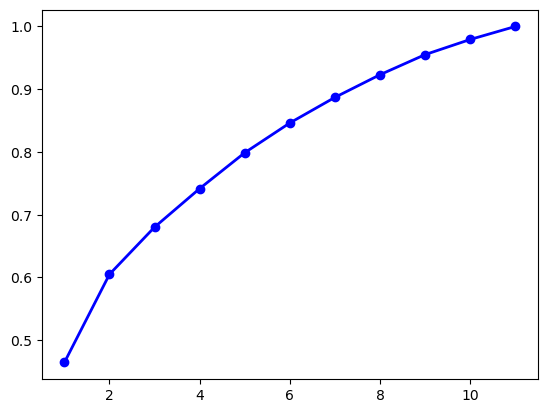

In [45]:
PC_values = np.arange(pca_marketing.n_components_) + 1

cummulative_variance = np.cumsum(pca_marketing.explained_variance_ratio_)

plt.plot(PC_values, cummulative_variance, 'o-', linewidth=2, color='blue')


# Analyzing principal components

In [47]:
# [Apply PCA to the dataset using the pca module in the sklearn library]

pca_marketing = PCA(n_components=6, random_state=1)

principal_components_marketing = pca_marketing.fit_transform(marketing_data_scaled)

loadings_df = pd.DataFrame(pca_marketing.components_).T
loadings_df = loadings_df.set_index(marketing_data.columns)

loadings_df

,0,1,2,3,4,5
MntWines,0.327941,0.222837,-0.435535,-0.208662,-0.087749,0.243052
MntFruits,0.323026,-0.130151,0.376355,0.140996,-0.224386,-0.012065
MntMeatProducts,0.354452,-0.130388,-0.209744,0.305524,0.151587,0.354552
MntFishProducts,0.333163,-0.142444,0.345355,0.150907,-0.049328,0.050934
MntSweetProducts,0.321179,-0.104676,0.363038,0.115690,-0.350306,0.047819
MntGoldProds,0.265813,0.189065,0.405995,-0.416516,0.693513,-0.128306
NumDealsPurchases,-0.042299,0.636331,0.077169,0.661013,0.144609,-0.268801
NumWebPurchases,0.245131,0.493262,0.039387,-0.358028,-0.270322,0.161445
NumCatalogPurchases,0.360813,0.009298,-0.269517,0.235563,0.316932,0.252435
NumStorePurchases,0.329634,0.187143,-0.241080,-0.112152,-0.297203,-0.574865


In [48]:
# Filter out loadings below a specific threshold

loadings_df.where(abs(loadings_df) >= .35)

,0,1,2,3,4,5
MntWines,NaN,NaN,-0.435535,NaN,NaN,NaN
MntFruits,NaN,NaN,0.376355,NaN,NaN,NaN
MntMeatProducts,0.354452,NaN,NaN,NaN,NaN,0.354552
MntFishProducts,NaN,NaN,NaN,NaN,NaN,NaN
MntSweetProducts,NaN,NaN,0.363038,NaN,-0.350306,NaN
MntGoldProds,NaN,NaN,0.405995,-0.416516,0.693513,NaN
NumDealsPurchases,NaN,0.636331,NaN,0.661013,NaN,NaN
NumWebPurchases,NaN,0.493262,NaN,-0.358028,NaN,NaN
NumCatalogPurchases,0.360813,NaN,NaN,NaN,NaN,NaN
NumStorePurchases,NaN,NaN,NaN,NaN,NaN,-0.574865


# Implementing factor analysis on multiple variables

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo

In [4]:
satisfaction_data = pd.read_csv('data/website_survey.csv')

satisfaction_data = satisfaction_data[[f'q{n}' for n in range(1,27)]]

satisfaction_data.head()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20,q21,q22,q23,q24,q25,q26
0,9,7,6,6,7,7,6,6,5,5,5,3,6,4,5,4,8,4,6,5,6,6,5,2,5,3
1,10,10,10,9,10,10,10,10,9,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,8
2,10,10,10,10,10,10,10,10,10,10,10,10,6,9,7,9,9,8,10,10,10,10,9,9,8,8
3,5,8,5,5,5,5,5,6,6,8,7,8,10,9,5,7,7,9,10,8,8,10,10,8,10,6
4,9,10,9,10,9,7,8,5,7,8,7,8,10,9,8,7,7,8,8,8,9,9,10,10,10,10


In [13]:
satisfaction_data.corr()[satisfaction_data.corr() < 1]

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20,q21,q22,q23,q24,q25,q26
q1,NaN,0.732557,0.601434,0.566234,0.607621,0.370763,0.459210,0.333309,0.033092,0.069668,0.329246,0.098384,0.228463,0.306795,0.412592,0.097271,0.323691,0.280609,0.279557,0.434450,0.460769,0.373225,0.200752,0.213424,0.287148,0.226838
q2,0.732557,NaN,0.593326,0.739373,0.628895,0.246588,0.349147,0.380736,0.192304,0.258513,0.444149,0.243081,0.289152,0.381255,0.385593,0.220309,0.383603,0.297904,0.382702,0.529213,0.522291,0.425659,0.326854,0.240745,0.388849,0.339132
q3,0.601434,0.593326,NaN,0.647676,0.552131,0.172054,0.308335,0.420688,0.187925,0.157351,0.248134,0.154305,0.248558,0.390587,0.313491,0.193133,0.387370,0.341007,0.295327,0.409462,0.497751,0.308314,0.098932,0.238922,0.295704,0.179385
q4,0.566234,0.739373,0.647676,NaN,0.593274,0.179106,0.218992,0.378380,0.071463,0.149129,0.352352,0.151400,0.202253,0.363526,0.296370,0.234265,0.299033,0.308255,0.408938,0.436496,0.489926,0.341183,0.240013,0.241790,0.358909,0.239614
q5,0.607621,0.628895,0.552131,0.593274,NaN,0.480150,0.500265,0.481930,0.329357,0.273870,0.451395,0.418745,0.388110,0.471812,0.561797,0.306467,0.511105,0.367275,0.420468,0.497811,0.471196,0.471106,0.385919,0.357058,0.466934,0.350171
q6,0.370763,0.246588,0.172054,0.179106,0.480150,NaN,0.666100,0.701205,0.388504,0.437400,0.512997,0.425281,0.525631,0.416356,0.598959,0.404633,0.605565,0.247161,0.413837,0.537055,0.481797,0.595427,0.470235,0.429972,0.443095,0.474170
q7,0.459210,0.349147,0.308335,0.218992,0.500265,0.666100,NaN,0.510057,0.350293,0.307583,0.564893,0.306288,0.553094,0.458095,0.610109,0.403335,0.666361,0.448136,0.513304,0.562642,0.508320,0.633145,0.498880,0.535975,0.544221,0.567023
q8,0.333309,0.380736,0.420688,0.378380,0.481930,0.701205,0.510057,NaN,0.479199,0.482602,0.564248,0.445646,0.498580,0.504259,0.587864,0.422222,0.644112,0.450204,0.534457,0.622011,0.647805,0.627109,0.434245,0.434191,0.490195,0.470124
q9,0.033092,0.192304,0.187925,0.071463,0.329357,0.388504,0.350293,0.479199,NaN,0.568667,0.495265,0.588134,0.297441,0.368019,0.495177,0.578818,0.410685,0.479387,0.441629,0.558843,0.510781,0.500321,0.468448,0.417570,0.443989,0.514908
q10,0.069668,0.258513,0.157351,0.149129,0.273870,0.437400,0.307583,0.482602,0.568667,NaN,0.571844,0.692447,0.551614,0.527115,0.451777,0.579657,0.438689,0.447040,0.518413,0.526933,0.390390,0.500343,0.520452,0.446936,0.501505,0.498620


In [15]:
# Check for multicollinearity

satisfaction_data.corr()[(satisfaction_data.corr() > 0.8) & (satisfaction_data.corr() < 1)]

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20,q21,q22,q23,q24,q25,q26
q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
satisfaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   q1      73 non-null     int64
 1   q2      73 non-null     int64
 2   q3      73 non-null     int64
 3   q4      73 non-null     int64
 4   q5      73 non-null     int64
 5   q6      73 non-null     int64
 6   q7      73 non-null     int64
 7   q8      73 non-null     int64
 8   q9      73 non-null     int64
 9   q10     73 non-null     int64
 10  q11     73 non-null     int64
 11  q12     73 non-null     int64
 12  q13     73 non-null     int64
 13  q14     73 non-null     int64
 14  q15     73 non-null     int64
 15  q16     73 non-null     int64
 16  q17     73 non-null     int64
 17  q18     73 non-null     int64
 18  q19     73 non-null     int64
 19  q20     73 non-null     int64
 20  q21     73 non-null     int64
 21  q22     73 non-null     int64
 22  q23     73 non-null     int64
 23  q24     73 non-nu

In [7]:
# Test the suitability of the data using the calculate_kmo class in factor_analyzer library
kmo_all, kmo_model = calculate_kmo(satisfaction_data)

kmo_model

# Apply factor analyzer to the dataset 

fa = FactorAnalyzer(n_factors=6, rotation='varimax')

fa.fit(satisfaction_data)

# Check the loadings
loading_output = pd.DataFrame(fa.loadings_, index=satisfaction_data.columns)

loading_output

0.8679550321475639

In [8]:
# Apply factor analyzer to the dataset 

fa = FactorAnalyzer(n_factors=6, rotation='varimax')

fa.fit(satisfaction_data)

FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

In [10]:
loading_output = pd.DataFrame(fa.loadings_, index=satisfaction_data.columns)

loading_output

,0,1,2,3,4,5
q1,0.091495,0.773220,-0.075197,0.323028,0.025180,-0.011134
q2,0.170028,0.835743,0.138555,0.107889,0.059724,0.043701
q3,0.030677,0.714850,0.035009,0.096148,0.127674,0.218543
q4,0.129466,0.816115,0.068117,-0.029781,0.133684,0.100296
q5,0.190598,0.651182,0.238826,0.368984,0.036734,0.015868
q6,0.216372,0.121810,0.243359,0.804852,0.108610,0.049316
q7,0.412134,0.238174,0.072134,0.625986,0.165875,0.113483
q8,0.184605,0.288332,0.286474,0.525538,0.206809,0.339109
q9,0.294554,0.006791,0.569362,0.226370,-0.114852,0.530619
q10,0.299583,0.045600,0.639910,0.171549,0.224400,0.157741


# Determining the number of factors

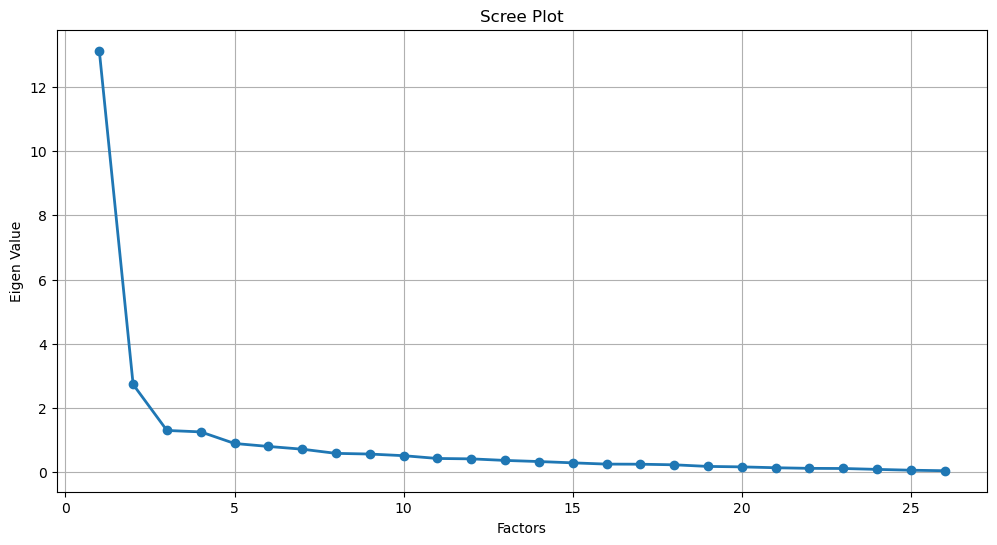

In [20]:
import numpy as np 


fa = FactorAnalyzer(rotation='varimax', n_factors=satisfaction_data.shape[1])
fa.fit(satisfaction_data)

ev, _ = fa.get_eigenvalues()

factor_values = np.arange(satisfaction_data.shape[1]) + 1

plt.figure(figsize=(12, 6))

plt.plot(factor_values, ev, 'o-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')

plt.grid()

In [21]:
fa = FactorAnalyzer(n_factors=5, rotation='varimax')

fa.fit(satisfaction_data)

# Generate loadings

loading_output = pd.DataFrame(fa.loadings_, index=satisfaction_data.columns)
loading_output

,0,1,2,3,4
q1,0.099961,0.774357,-0.079795,0.321797,0.015576
q2,0.178909,0.836019,0.135454,0.101916,0.063459
q3,0.041438,0.713113,0.055440,0.095694,0.254581
q4,0.146058,0.811110,0.070999,-0.031095,0.166014
q5,0.202457,0.655376,0.237125,0.362648,0.002515
q6,0.239624,0.122927,0.257562,0.802537,0.059996
q7,0.436143,0.237686,0.090813,0.621522,0.151444
q8,0.201393,0.286128,0.332926,0.520492,0.355756
q9,0.253617,0.030815,0.584818,0.208287,0.250758
q10,0.333174,0.045337,0.656804,0.164210,0.182566


In [22]:
# Filter the loading with a specific threshold 

loading_output.where(abs(loading_output) > 0.5)

,0,1,2,3,4
q1,NaN,0.774357,NaN,NaN,NaN
q2,NaN,0.836019,NaN,NaN,NaN
q3,NaN,0.713113,NaN,NaN,NaN
q4,NaN,0.811110,NaN,NaN,NaN
q5,NaN,0.655376,NaN,NaN,NaN
q6,NaN,NaN,NaN,0.802537,NaN
q7,NaN,NaN,NaN,0.621522,NaN
q8,NaN,NaN,NaN,0.520492,NaN
q9,NaN,NaN,0.584818,NaN,NaN
q10,NaN,NaN,0.656804,NaN,NaN


In [23]:
# Generate the communalities

pd.DataFrame(fa.get_communalities(), index=satisfaction_data.columns, columns=['Communalities'])

,Communalities
q1,0.719784
q2,0.763698
q3,0.587289
q4,0.712800
q5,0.658255
q6,0.786534
q7,0.664188
q8,0.630742
q9,0.513547
q10,0.604748
